In [2]:
import pandas as pd # Data manipulation
import numpy as np 
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # For data visualization
import plotly.express as px # For interactive data visualization 
from  plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot # For ofline data visualization
import cufflinks as cf # Act as connection linle between the numpy and plotly
cf.go_offline()
init_notebook_mode(connected=True) # Connect the java script with the jupiter notebook 
from jupyterthemes import jtplot # Jupyter theme
jtplot.style(theme= 'monokai', context= 'notebook', ticks= True, grid= False)



In [3]:
customer_df = pd.read_csv('telecom_churn.csv')

print(customer_df.info())

customer_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [4]:
customer_df.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


<h1>Data visualization 

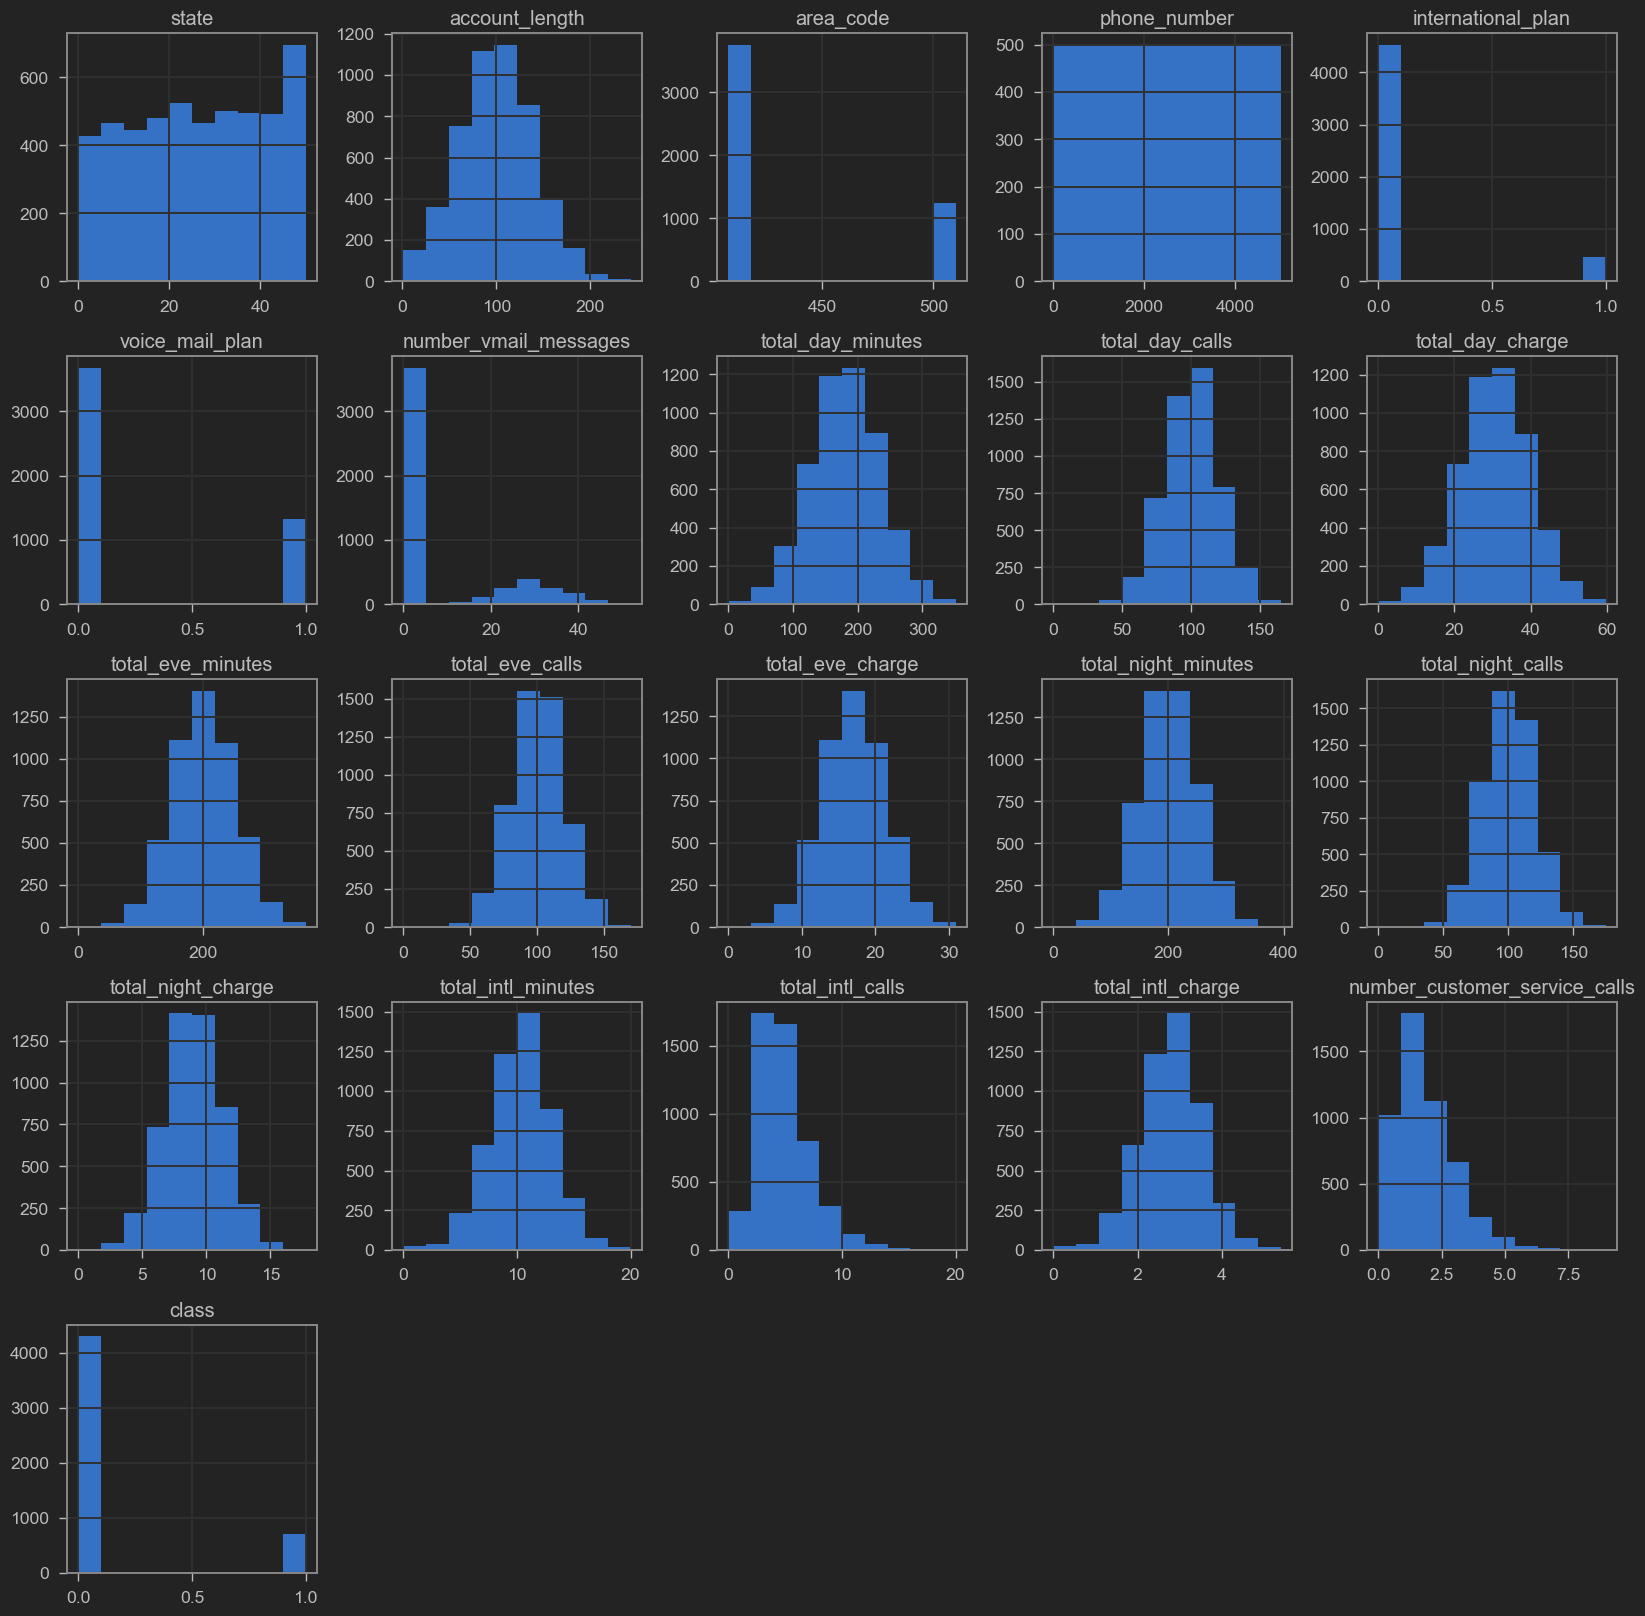

In [5]:

customer_df.hist(figsize=(20,20))
plt.show()

In [6]:
customer_df['class'].value_counts()

class
0    4293
1     707
Name: count, dtype: int64

In [7]:
import plotly.graph_objects as go 

fig = go.Figure(data=[go.Pie(labels= ['Retain (0)' , 'Exited (1)'],values= customer_df['class'].value_counts())])
fig.show()

In [8]:
fig = px.histogram(customer_df , x='international_plan' , color='class')
fig.show()

<h3>correlation Matrix

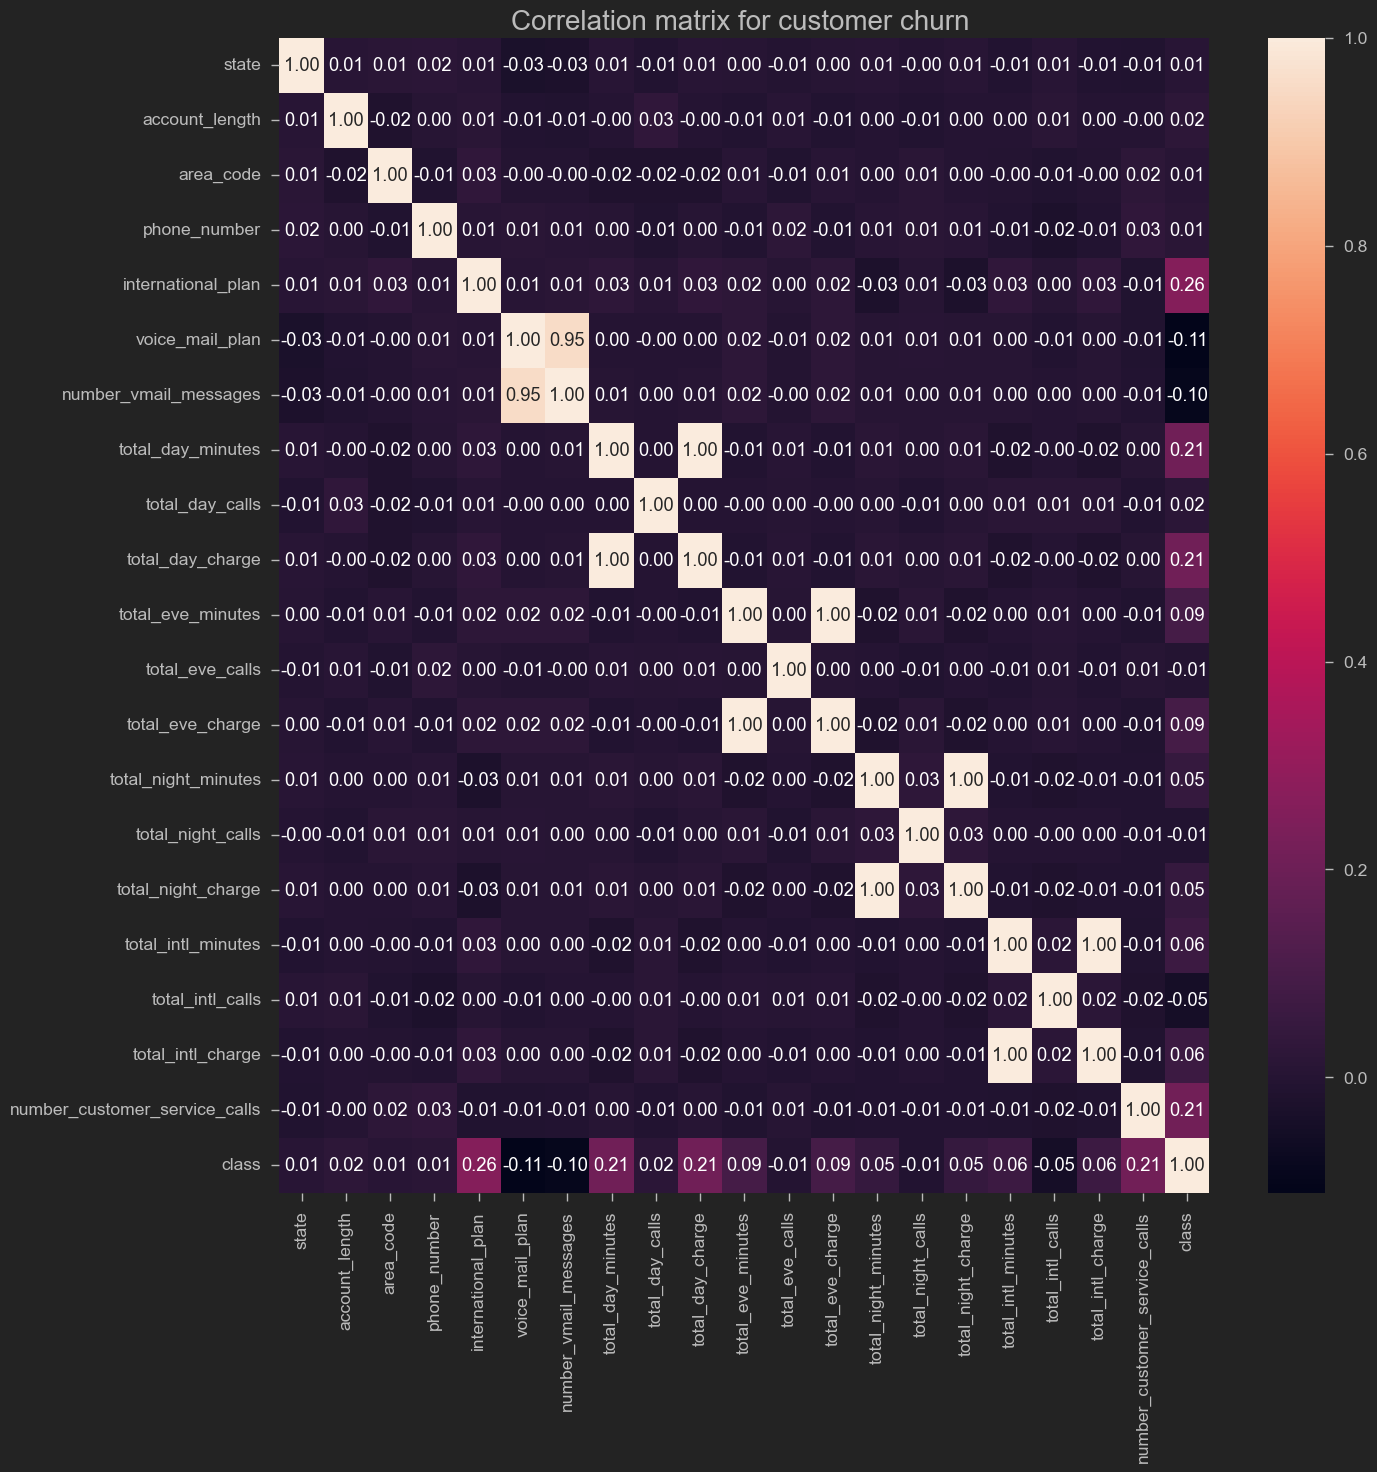

In [9]:
correlation_matrixs = customer_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrixs , annot=True , fmt = '0.2f')
plt.title("Correlation matrix for customer churn " , fontsize= 20)
plt.show()

<h3>kdeplot

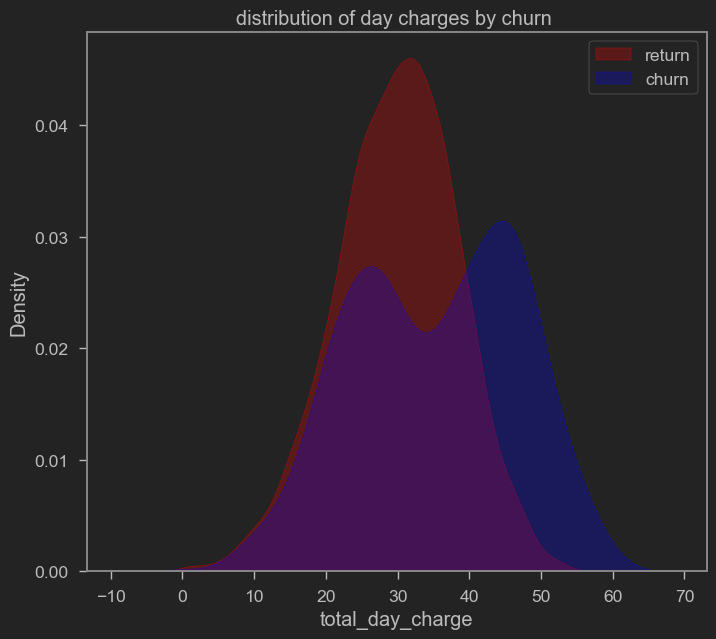

In [10]:
ax = sns.kdeplot(customer_df.total_day_charge[(customer_df['class']==0)],color= "Red" , fill = True)
ax = sns.kdeplot(customer_df.total_day_charge[(customer_df['class']==1)],color= "Blue" , fill = True)
plt.legend(['return' , 'churn'] , loc = 'upper right')
plt.title("distribution of day charges by churn ")
plt.show()

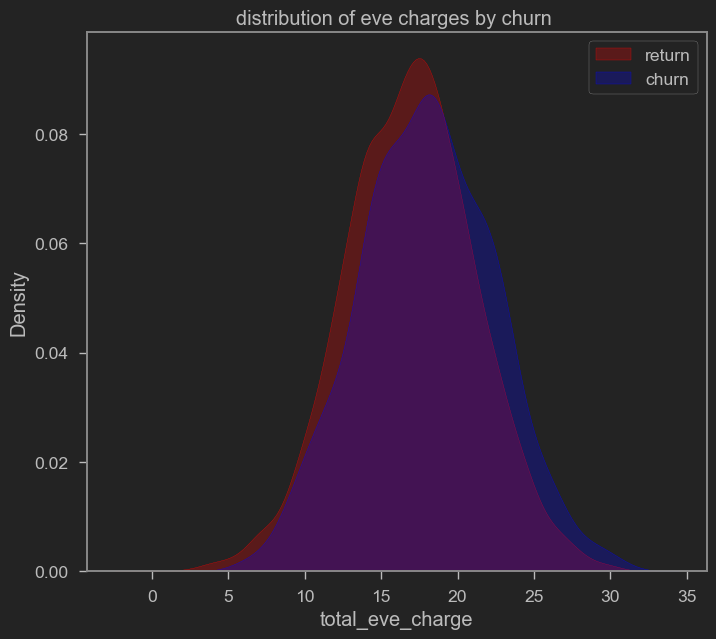

In [11]:

ax = sns.kdeplot(customer_df.total_eve_charge[(customer_df['class']==0)],color= "Red" , fill = True)
ax = sns.kdeplot(customer_df.total_eve_charge[(customer_df['class']==1)],color= "Blue" , fill = True)
plt.legend(['return' , 'churn'] , loc = 'upper right')
plt.title("distribution of eve charges by churn ")
plt.show()

<h3>Histogram 

In [12]:
fig  = px.histogram(customer_df , x = 'voice_mail_plan' , color='class')
fig.show()

<h2>classification model

In [13]:
x = customer_df.drop(['class','area_code','phone_number'],axis=1)
y=customer_df['class']

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train ,y_test = train_test_split(x,y, test_size=0.3)

print(f"shape of training set {x_train.shape}\nshape of testing set {x_test.shape}")


shape of training set (3500, 18)
shape of testing set (1500, 18)


<h5>Caculating column of most importance

In [15]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)


RandomForestClassifier()

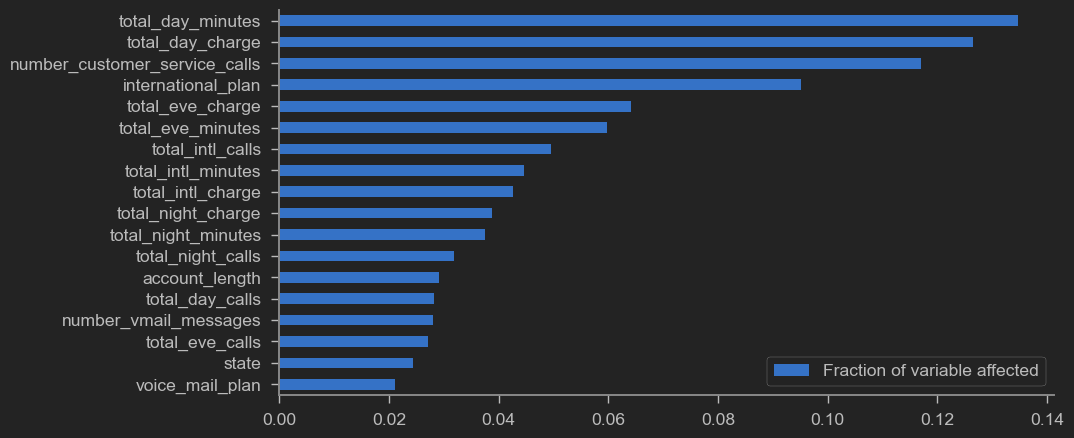

In [16]:
feature_score = pd.DataFrame({"Fraction of variable affected" : rfc.feature_importances_}, index=x.columns)
feature_score = feature_score.sort_values(by='Fraction of variable affected')
feature_score.plot( kind="barh" , figsize=(10,5))
sns.despine()

<h3>Logistic Regression

In [17]:
# logistic regrestion model
from sklearn.preprocessing import StandardScaler
standerscaler = StandardScaler()
x_train = standerscaler.fit_transform(x_train)
x_test = standerscaler.transform(x_test)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

<Axes: >

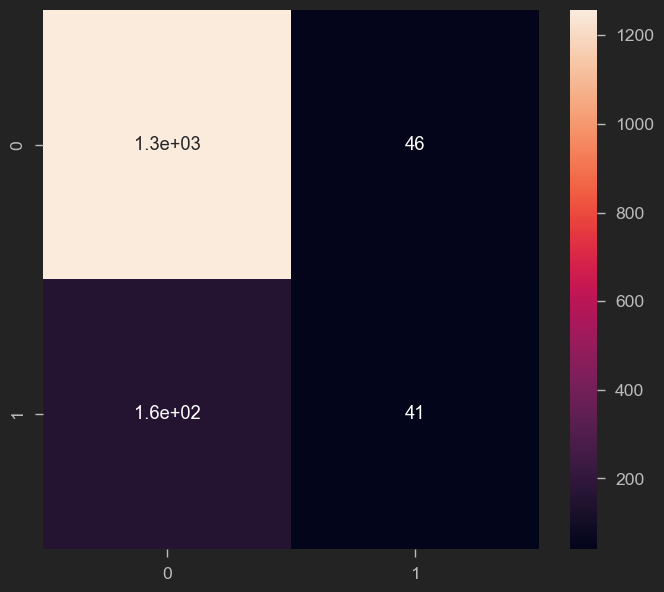

In [18]:
y_hat = lr.predict(x_test)
y_hat_prob = lr.predict_proba(x_test)

from sklearn.metrics import confusion_matrix ,classification_report

cm = confusion_matrix(y_test , y_hat)
sns.heatmap(cm , annot=True)

In [19]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1303
           1       0.47      0.21      0.29       197

    accuracy                           0.87      1500
   macro avg       0.68      0.59      0.61      1500
weighted avg       0.83      0.87      0.84      1500



<h3>Support vectore machine

In [20]:
import sklearn.svm as svm
from sklearn.calibration import CalibratedClassifierCV
SVM = svm.LinearSVC(max_iter=10000)
SVM = CalibratedClassifierCV(SVM)
SVM.fit(x_train,y_train)


CalibratedClassifierCV(estimator=LinearSVC(max_iter=10000))

In [21]:
y_hat = SVM.predict(x_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1303
           1       0.43      0.18      0.25       197

    accuracy                           0.86      1500
   macro avg       0.66      0.57      0.59      1500
weighted avg       0.83      0.86      0.83      1500



<Axes: >

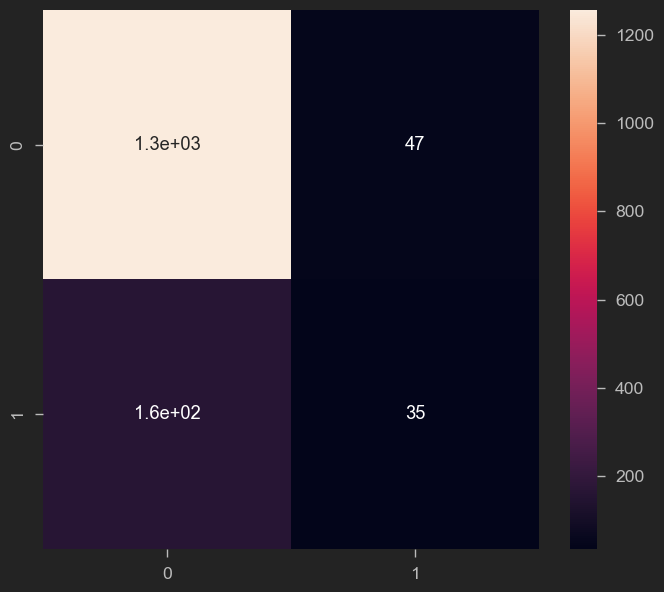

In [22]:
from sklearn.metrics import confusion_matrix ,classification_report

cm = confusion_matrix(y_test , y_hat)
sns.heatmap(cm , annot=True)

<h3>Random forest classifiers

In [23]:
from sklearn.ensemble import RandomForestClassifier


RF = RandomForestClassifier()
Rf= CalibratedClassifierCV(RF)
RF.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
y_hat=RF.predict(x_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1303
           1       0.94      0.77      0.85       197

    accuracy                           0.96      1500
   macro avg       0.95      0.88      0.91      1500
weighted avg       0.96      0.96      0.96      1500



<Axes: >

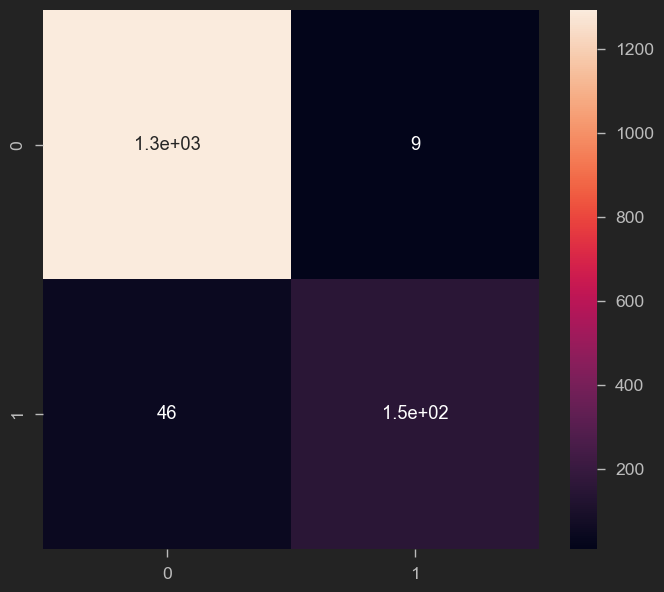

In [25]:
from sklearn.metrics import confusion_matrix ,classification_report

cm = confusion_matrix(y_test , y_hat)
sns.heatmap(cm , annot=True)


<h3>K nearest Neighbour

In [26]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(x_train  , y_train)

KNeighborsClassifier()

In [27]:
y_hat=KNN.predict(x_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1303
           1       0.76      0.36      0.49       197

    accuracy                           0.90      1500
   macro avg       0.83      0.67      0.72      1500
weighted avg       0.89      0.90      0.88      1500



<Axes: >

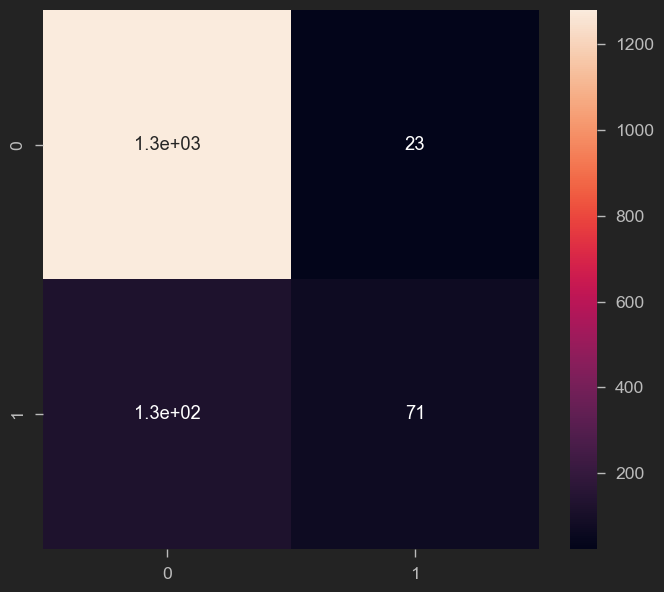

In [28]:
cm = confusion_matrix(y_test , y_hat)
sns.heatmap(cm , annot=True)

<h3>NAIVE BAYES

In [29]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train,y_train)

GaussianNB()

In [30]:
y_hat=NB.predict(x_test)
print(classification_report(y_test,y_hat))


              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1303
           1       0.47      0.53      0.50       197

    accuracy                           0.86      1500
   macro avg       0.70      0.72      0.71      1500
weighted avg       0.87      0.86      0.86      1500



<Axes: >

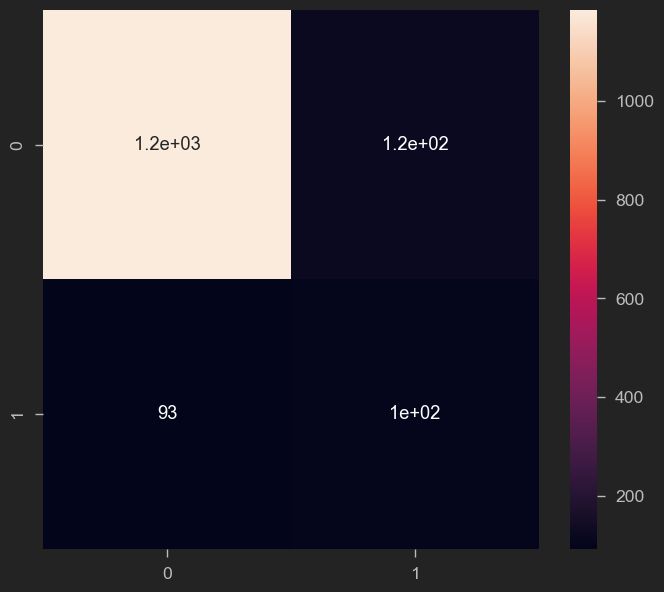

In [31]:
cm = confusion_matrix(y_test , y_hat)
sns.heatmap(cm , annot=True)

<h3>ROC 


In [32]:
from sklearn.metrics import roc_curve
fpr1 , tpr1 , thresh1 = roc_curve(y_test,lr.predict_proba(x_test)[:,1] , pos_label=1)
fpr2 , tpr2 , thresh2 = roc_curve(y_test,SVM.predict_proba(x_test)[:,1] , pos_label=1)
fpr3 , tpr3 , thresh3 = roc_curve(y_test,RF.predict_proba(x_test)[:,1] , pos_label=1)
fpr4 , tpr4 , thresh4 = roc_curve(y_test,KNN.predict_proba(x_test)[:,1] , pos_label=1)
fpr5 , tpr5 , thresh5 = roc_curve(y_test,NB.predict_proba(x_test)[:,1] , pos_label=1)

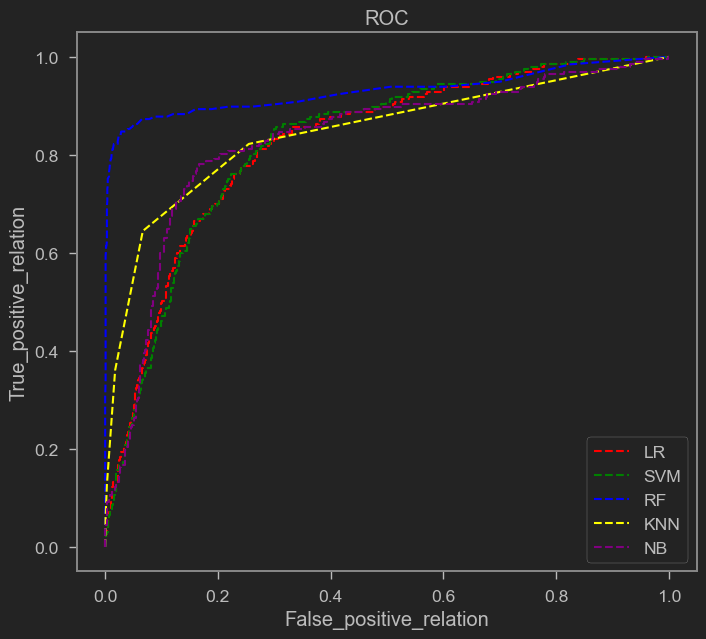

In [48]:
plt.plot(fpr1 , tpr1 ,linestyle="--",color = "Red" , label ="LR")
plt.plot(fpr2 , tpr2 ,linestyle="--",color="green" , label ="SVM")
plt.plot(fpr3 , tpr3 ,linestyle="--",color="blue" , label ="RF")
plt.plot(fpr4 , tpr4 ,linestyle="--",color="yellow" , label ="KNN")
plt.plot(fpr5 , tpr5 ,linestyle="--",color="purple" , label ="NB")

plt.title("ROC")
plt.xlabel("False_positive_relation")
plt.ylabel("True_positive_relation")
plt.legend(loc= 'best')
plt.show()